Titanic Data

Question: There is an old adage that at sea, when a ship is sinking, women and children are supposed to be the first ones into the lifeboats. Did the crew of the Titanic adhere to this principle? The data does not support directly who made it onto the lifeboats, so we will assume that those who survived had been able to get into a lifeboat and those who did not survive were not.

In [1]:
#code to import titanic data into the ipython notebook and various 
#code extensions.
import pandas as pd
import numpy as np


titanic_df = pd.read_csv('C:/Users/justin/Desktop/Nanodegree_Project2/titanic_data.csv', header=0)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
#inspect the data to see if there are any obvious problems,
#and get a sense of the data structure
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As expected the data has 891 rows of data and 12 columns. One thing I noticed was the 'Age' column only had 714 rows associated. So I  know that some of the ages must be missing data, but the min/max look resonable.

In [3]:
#checking for any duplicate rows
titanic_df[titanic_df.duplicated() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
gender_counts = titanic_df['Sex'].value_counts()
gender_counts

male      577
female    314
Name: Sex, dtype: int64

In [7]:
survival_counts = titanic_df['Survived'].value_counts()
survival_counts

0    549
1    342
Name: Survived, dtype: int64

In [8]:
titanic_df[titanic_df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


According to wikipedia the generally accepted usage by age for the various titles are as follows:
Mast. --> boys < 18
Mr. --> men 18+
Miss. --> unmarried women (< 18)
Mrs. --> Married owmen (18+)

*For the purposes of this analysis anyone with no specified age and the title of 'Miss.' will be assumed to be < 18 and those with no age and the title 'Mrs.' will be assumed to be 18+.

https://en.wikipedia.org/wiki/Title

In [ ]:
titanic_df

Populating the interactive namespace from numpy and matplotlib


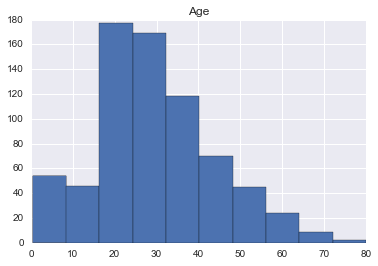

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df[['Age']].hist()
plt.show()

http://www.markhneedham.com/blog/2013/10/30/pandas-adding-a-column-to-a-dataframe-based-on-another-dataframe/